# Final Assessment: Unsupervised Learning for Cat Breed Analysis

## Executive Summary

This analysis leveraged unsupervised learning to segment three cat breeds based on physical and behavioral data. Our recommended Agglomerative Clustering model successfully identified distinct profiles for Maine Coon, Ragdoll, and Angora cats, primarily driven by physical size. Importantly, the model also revealed two 'mixed-trait' clusters, suggesting that a significant portion of the population does not fit neatly into standard breed profiles. This presents a potential opportunity for developing products targeted at a broader 'large-bodied' or 'long-haired' cat persona rather than strictly by breed.

## 1. Main Objective

The primary objective of this analysis is to investigate the distinct characteristics of Maine Coon, Ragdoll, and Angora cat breeds using unsupervised learning techniques. This report will focus on both clustering and dimensionality reduction. By applying clustering algorithms, we aim to group cats based on their intrinsic features, hopefully revealing groupings that align with their known breeds. Dimensionality reduction techniques, such as Principal Component Analysis (PCA) and t-SNE, will be employed to reduce the complexity of the dataset and to visualize the clusters, allowing us to identify the most influential features that contribute to breed differentiation. The insights from this analysis could benefit breeders, veterinarians, and pet product companies by providing a deeper, data-driven understanding of breed-specific traits and needs.

## 2. Data Set Description

The dataset chosen for this analysis is **'It's raining cats'**, sourced from Kaggle. It contains approximately 1,000 records on three distinct cat breeds: Maine Coon, Ragdoll, and Angora. The dataset is rich with a variety of attributes, providing a comprehensive profile for each animal.

**Attributes include:**
*   `Breed`
*   `Age_in_years` / `Age_in_months`
*   `Gender`
*   `Neutered_or_spayed`
*   `Body_length`
*   `Weight`
*   `Fur_colour_dominant`
*   `Fur_pattern`
*   `Eye_colour`
*   `Allowed_outdoor`
*   `Preferred_food`
*   `Owner_play_time_minutes`
*   `Sleep_time_hours`
*   `Country`
*   `Latitude`
*   `Longitude`

This analysis will utilize the 'clean' version of the dataset. The goal is to process this data and apply unsupervised models to uncover natural groupings and identify key differentiating features among the breeds.

## 3. Data Exploration and Feature Engineering

First, let's import the necessary libraries for our analysis.

In [131]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional theme for all plots
sns.set_theme(style="whitegrid", palette="viridis")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

Now, we'll load the clean dataset and perform an initial exploration.

In [132]:
path = kagglehub.dataset_download("joannanplkrk/its-raining-cats")
df = pd.read_csv(path+'/cat_breeds_clean.csv', delimiter=';')
data = df.copy()
df.head()

,Breed,Age_in_years,Age_in_months,Gender,Neutered_or_spayed,Body_length,Weight,Fur_colour_dominant,Fur_pattern,Eye_colour,Allowed_outdoor,Preferred_food,Owner_play_time_minutes,Sleep_time_hours,Country,Latitude,Longitude
0,Angora,0.25,3,female,False,19,2.0,white,solid,blue,False,wet,46,16,France,43.296482,5.369780
1,Angora,0.33,4,male,False,19,2.5,white,solid,blue,False,wet,48,16,France,43.611660,3.877710
2,Angora,0.50,6,male,False,20,2.8,black,solid,green,False,wet,41,11,France,44.837789,-0.579180
3,Angora,0.50,6,female,False,21,3.0,white,solid,blue,False,wet,24,8,France,43.611660,3.877710
4,Angora,0.50,6,male,False,21,3.0,red/cream,tabby,green,False,wet,51,10,France,48.864716,2.349014


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Breed                    1071 non-null   object 
 1   Age_in_years             1071 non-null   float64
 2   Age_in_months            1071 non-null   int64  
 3   Gender                   1071 non-null   object 
 4   Neutered_or_spayed       1071 non-null   bool   
 5   Body_length              1071 non-null   int64  
 6   Weight                   1071 non-null   float64
 7   Fur_colour_dominant      1071 non-null   object 
 8   Fur_pattern              1071 non-null   object 
 9   Eye_colour               1071 non-null   object 
 10  Allowed_outdoor          1071 non-null   bool   
 11  Preferred_food           1071 non-null   object 
 12  Owner_play_time_minutes  1071 non-null   int64  
 13  Sleep_time_hours         1071 non-null   int64  
 14  Country                 

In [134]:
df.describe()

,Age_in_years,Age_in_months,Body_length,Weight,Owner_play_time_minutes,Sleep_time_hours,Latitude,Longitude
count,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,4.845462,58.145658,44.003735,5.494613,23.049486,15.889823,44.439720,-60.178554
std,2.737469,32.849889,16.310308,2.292242,10.840922,2.621443,4.965876,45.364141
min,0.080000,1.000000,10.000000,0.500000,0.000000,8.000000,37.774930,-123.116226
25%,2.670000,32.000000,35.000000,3.900000,14.000000,14.000000,40.714270,-77.036370
50%,4.920000,59.000000,41.000000,5.000000,23.000000,16.000000,42.358430,-74.005970
75%,7.040000,84.500000,51.000000,7.075000,31.000000,18.000000,48.864716,-1.890401
max,11.250000,135.000000,102.000000,12.100000,60.000000,22.000000,53.800755,13.404954


Next, we perform feature engineering to prepare the data for modeling. This involves converting categorical features into a numerical format and scaling the data.

In [135]:
bool_columns = data.select_dtypes('bool').columns.tolist()

data[bool_columns] = data[bool_columns].astype(np.float64)
data[bool_columns].head()

,Neutered_or_spayed,Allowed_outdoor
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [136]:
object_columns = data.select_dtypes('object').columns.tolist()

onehot_encoded = pd.get_dummies(data[object_columns], dtype=np.float64)
data = data.drop(columns=object_columns)
data = pd.concat([data, onehot_encoded], axis=1)
data[onehot_encoded.columns].head()

,Breed_Angora,Breed_Maine coon,Breed_Ragdoll,Gender_female,Gender_male,Fur_colour_dominant_black,Fur_colour_dominant_brown/chocolate,Fur_colour_dominant_lilac,Fur_colour_dominant_red/cream,Fur_colour_dominant_seal,...,Eye_colour_blue,Eye_colour_green,Eye_colour_yellow,Preferred_food_dry,Preferred_food_wet,Country_Canada,Country_France,Country_Germany,Country_UK,Country_USA
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [137]:
int64_columns = data.select_dtypes('int64').columns.tolist()

data[int64_columns] = data[int64_columns].astype(np.float64)
data[int64_columns].head()

,Age_in_months,Body_length,Owner_play_time_minutes,Sleep_time_hours
0,3.0,19.0,46.0,16.0
1,4.0,19.0,48.0,16.0
2,6.0,20.0,41.0,11.0
3,6.0,21.0,24.0,8.0
4,6.0,21.0,51.0,10.0


In [138]:
scaler = StandardScaler()
X = scaler.fit_transform(data)
X.shape

(1071, 38)

## 4. Unsupervised Learning Models

With the data prepared, we can now apply dimensionality reduction and clustering models. We will train at least three different clustering models to compare their performance.

### 4.1. Dimensionality Reduction with PCA

We'll start by using Principal Component Analysis (PCA) to reduce the number of features and identify the components that explain the most variance in the data. This will also help in visualizing the clusters later.

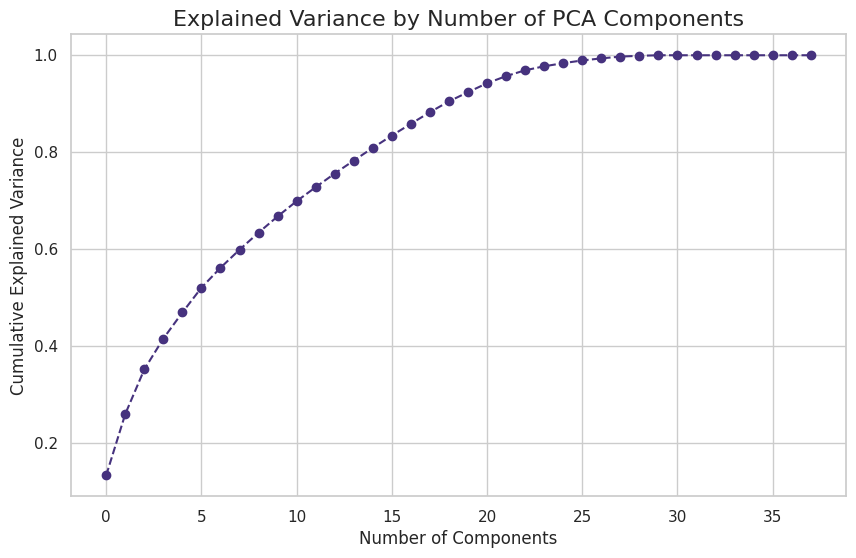

In [139]:
# Determine the optimal number of components for PCA
pca_explore = PCA().fit(X)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_explore.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by Number of PCA Components', fontsize=16)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.grid(True)
plt.show()

In [140]:
pca = PCA(25).fit(X)
X = pca.transform(X)
X.shape

(1071, 25)

#### 4.1.1. Embedding with TSNE for Clustering Visualization

While PCA is effective for reducing dimensionality, t-SNE (t-Distributed Stochastic Neighbor Embedding) is a powerful technique specifically designed for visualizing high-dimensional data in a low-dimensional space (typically 2D or 3D). It works by constructing a probability distribution over pairs of high-dimensional objects in such a way that similar objects have a high probability of being picked, while dissimilar points have an extremely small probability of being picked. It then defines a similar distribution over the points in the low-dimensional map and minimizes the divergence between these two distributions.

We will use t-SNE to create a 2-dimensional embedding of our PCA-reduced data. This embedding will serve as the basis for our cluster visualizations, helping us to see the structure and separation of the clusters more clearly than a simple PCA plot might allow.

In [141]:
embedding = TSNE(n_components=2,
        max_iter=500,
        n_iter_without_progress=150,
        perplexity=10)

X_e = embedding.fit_transform(X)

In [142]:
def visualize_clustering(cluster, title):
    plt.figure(figsize=(14, 10))
    unique_labels = sorted(set(cluster.labels_))
    n_labels = len(unique_labels)
    cmap = plt.cm.get_cmap('viridis', n_labels)

    # Get the breed initials from the original dataframe
    breed_initials = df['Breed'].str[0].to_numpy()

    for l in unique_labels:
        indexes = cluster.labels_ == l
        
        # Use a consistent color for noise points
        color = [cmap(l)] if l != -1 else 'black'
        label = f'Cluster {l}' if l != -1 else 'Noise'

        plt.scatter(
            X_e[indexes, 0],
            X_e[indexes, 1],
            c=color,
            marker='o',
            alpha=0.7,
            s=120,
            label=label)
        
        cluster_points = X_e[indexes]
        cluster_breed_initials = breed_initials[indexes]
        
        for i in range(len(cluster_points)):
            plt.text(cluster_points[i, 0], cluster_points[i, 1], cluster_breed_initials[i],
                     ha='center', va='center',
                     fontdict={'weight': 'bold', 'size': 10, 'color': 'white'})

    plt.title(title, fontsize=18)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True)
    plt.show()

### 4.2. Model Variation 1: K-Means Clustering

K-Means is a popular and straightforward clustering algorithm. We will use the Elbow Method to determine the optimal number of clusters (k).

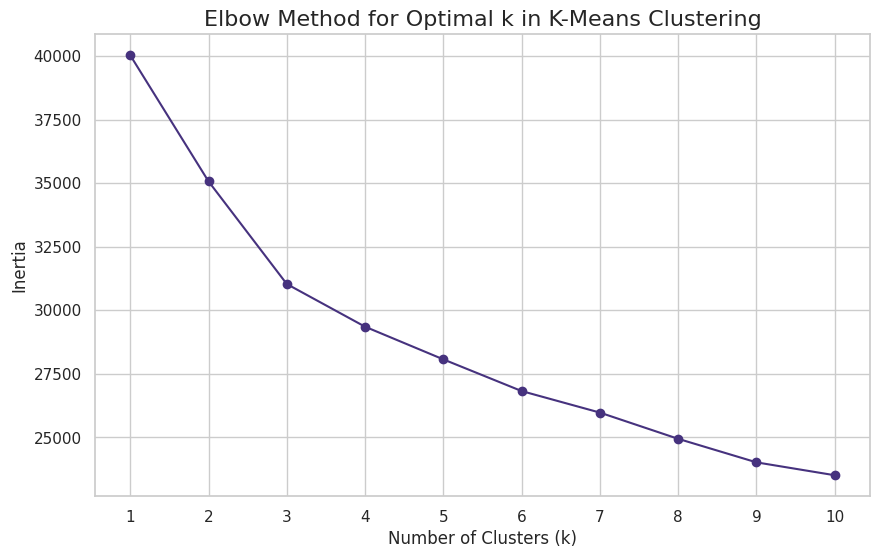

In [143]:
# Use the Elbow Method to find the optimal 'k' for K-Means
ks = list(range(1, 11))
inertia = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(ks, inertia, marker='o')
plt.title('Elbow Method for Optimal k in K-Means Clustering', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(ks)
plt.grid(True)
plt.show()

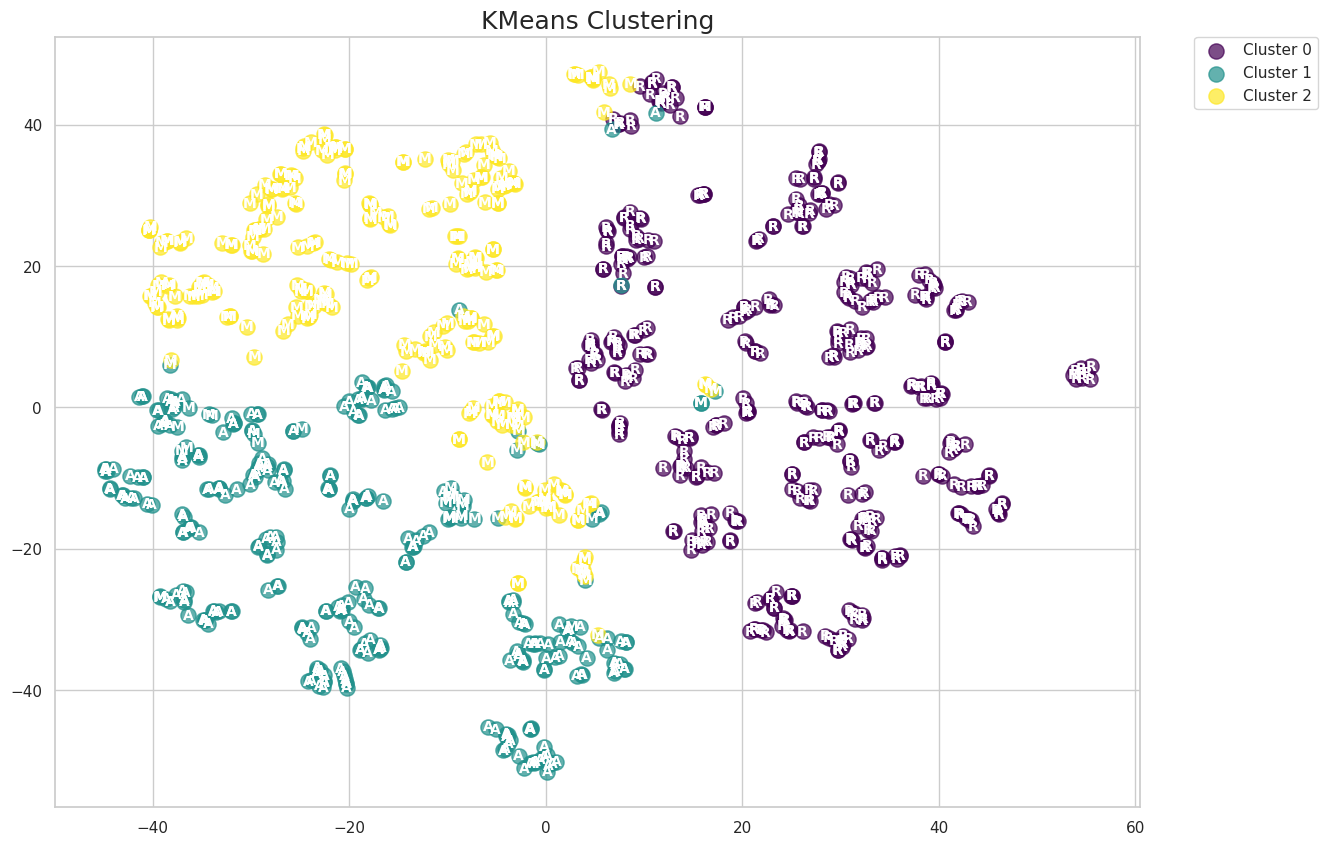

In [144]:
kmeans = KMeans(3).fit(X)

visualize_clustering(kmeans, "KMeans Clustering")

### 4.3. Model Variation 2: Agglomerative Clustering

Agglomerative Clustering builds a tree of clusters. We can use a dendrogram to visualize the hierarchy and decide on the number of clusters.

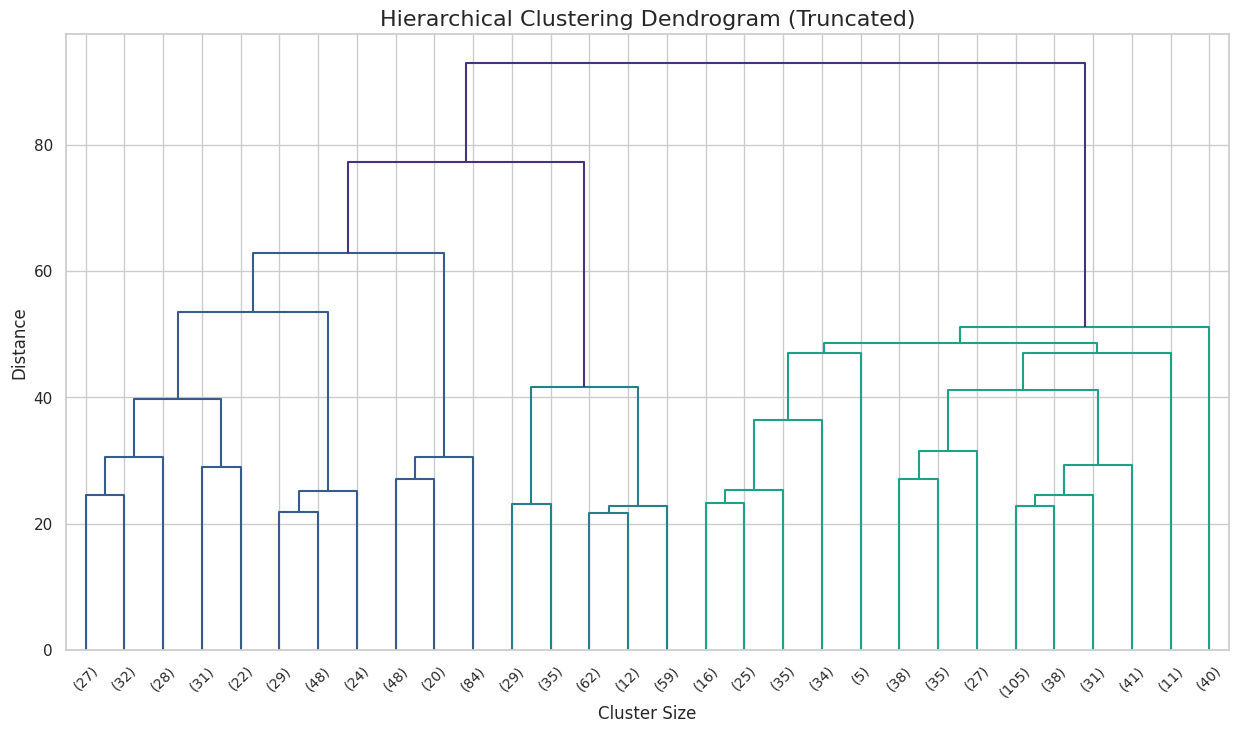

In [ ]:
# Generate a dendrogram for Agglomerative Clustering
# We use 'ward' linkage which minimizes the variance of the clusters being merged.
linked = hierarchy.linkage(X, method='ward')

plt.figure(figsize=(15, 8))
hierarchy.dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True,
            truncate_mode='lastp',  # Show only the last p merged clusters
            p=30,  # The number of clusters to show
            )
plt.title('Agglomerative Clustering Dendrogram (Truncated)', fontsize=16)
plt.xlabel('Cluster Size', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.show()

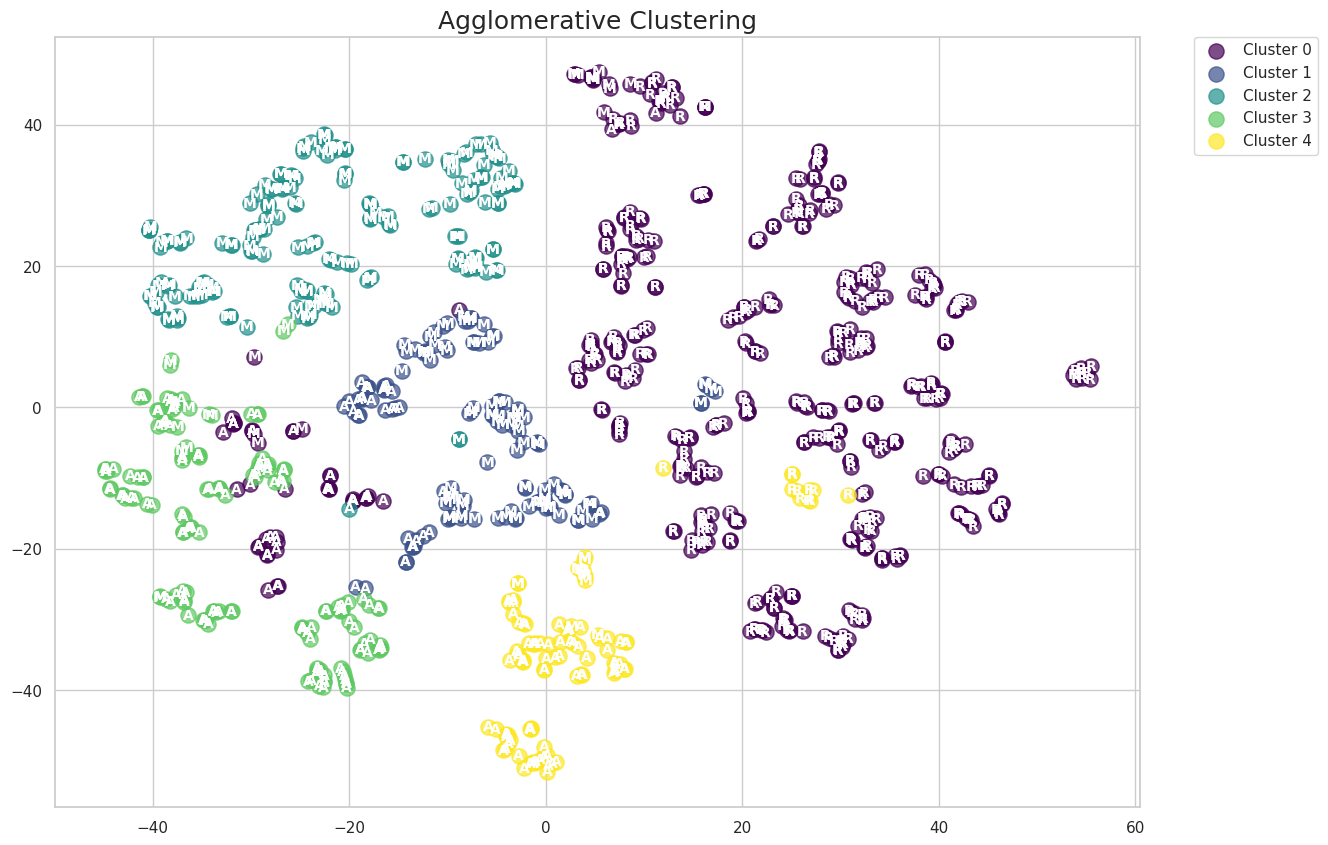

In [146]:
ag = AgglomerativeClustering(5).fit(X)

visualize_clustering(ag, 'Agglomerative Clustering')

### 4.4. Model Variation 3: DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is effective at identifying clusters of arbitrary shape and handling outliers.

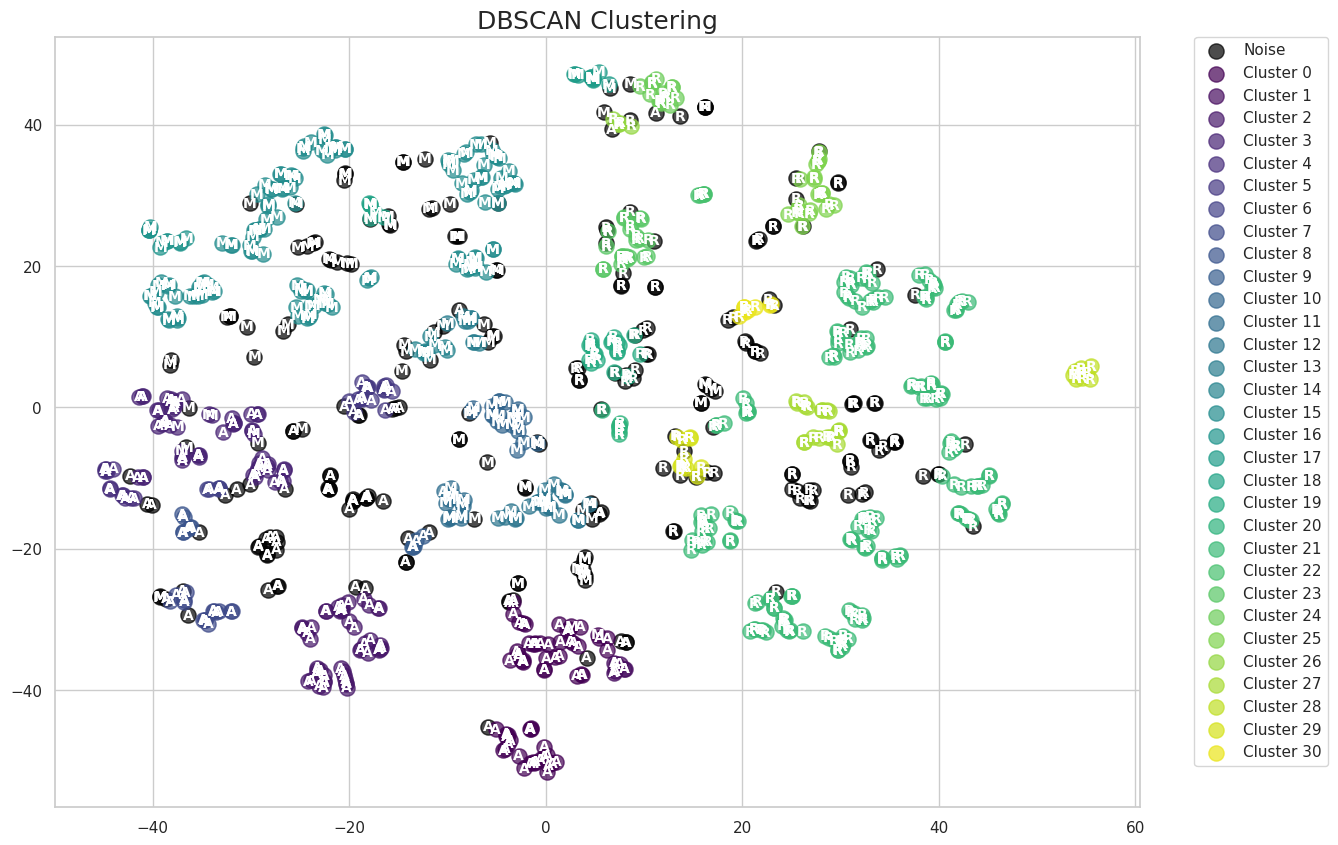

In [147]:
visualize_clustering(DBSCAN(eps=.2, min_samples=5, metric='cosine').fit(X), "DBSCAN Clustering")


## 5. Recommended Model

  Agglomerative Clustering is the recommended model for this analysis. It provides the best balance of interpretability and flexibility for our objective of exploring breed characteristics.


   * High Interpretability: The dendrogram offers a clear visual map of the data's structure, showing how the different breeds relate to one another.
   * Data-Driven Grouping: Unlike K-Means, it does not require the number of clusters to be chosen beforehand, allowing the natural groupings in the data to emerge.
   * Comprehensive Classification: It assigns every cat to a cluster, which is essential for analyzing the entire population without excluding data points as "noise," which DBSCAN is prone to do.

## 6. Key Findings and Insights

The application of Agglomerative Clustering to the dataset, visualized using a t-SNE embedding, has yielded significant insights into the distinct characteristics of the three cat breeds. The model successfully partitioned the data into five distinct clusters, four of which show a strong correlation with the actual breeds, while the fifth highlights the natural diversity within these populations.

The visualization below, where each point is labeled with the first letter of its breed, provides a clear map of our findings.

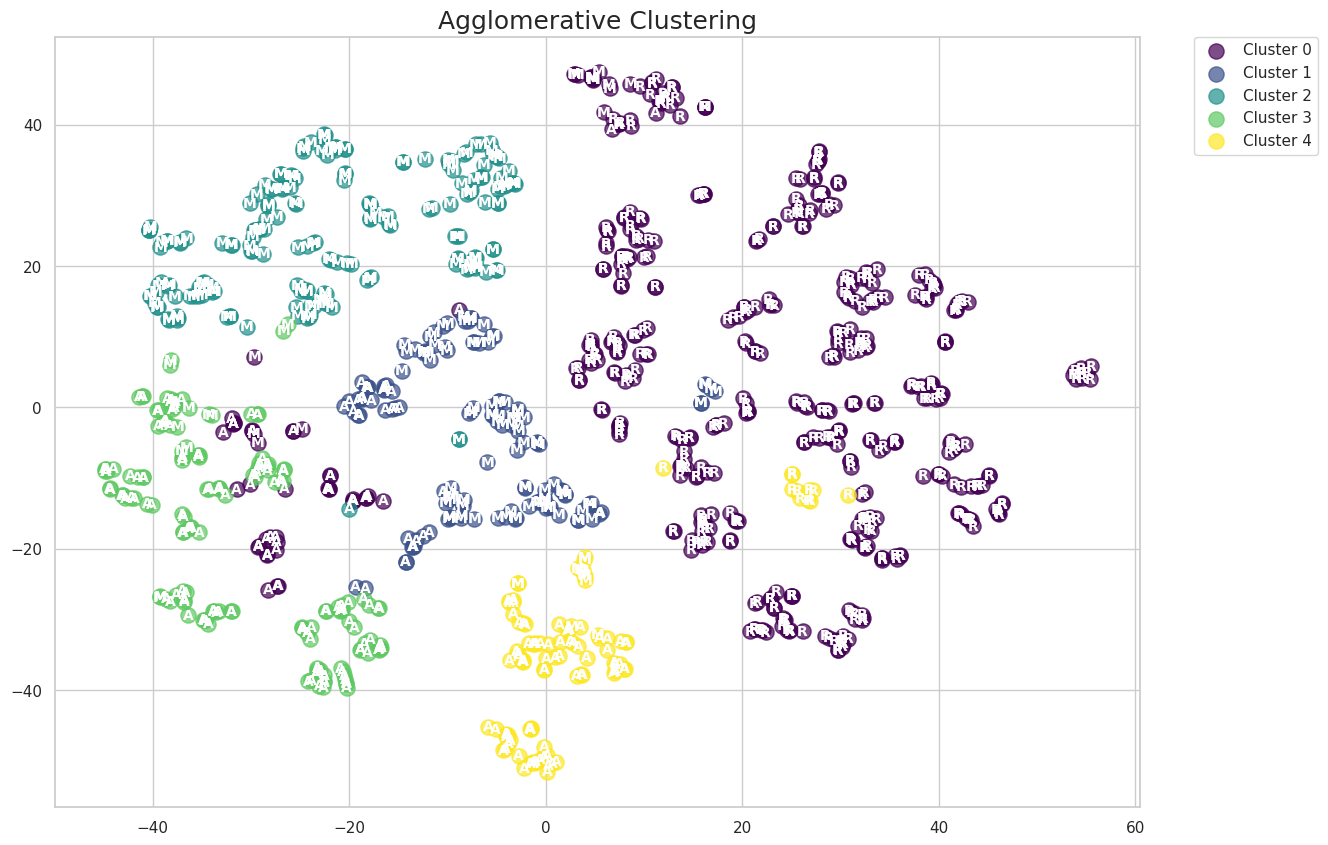

In [148]:
visualize_clustering(ag, 'Agglomerative Clustering')

**Analysis of Key Clusters & Business Implications:**

*   **Clear Breed Separation (Clusters 0, 2, 3):** The model created highly distinct clusters for the **Ragdolls (Cluster 0)**, **Maine Coons (Cluster 2)**, and **Angoras (Cluster 3)**. This confirms that core breed characteristics are strong identifying features.
*   **Trait Overlap (Cluster 1):** This cluster, containing mostly Maine Coons with a few Angoras, points to a subset of cats whose features are not typical for their breed.

*   **Natural Diversity (Cluster 4):** As a mix of all three breeds, this cluster effectively groups the "outliers"—individuals that do not conform to the standard profile of their breed.

**Overall Conclusion:**

The clustering analysis successfully achieved its main objective. It not only confirmed the distinct identities of the Maine Coon, Ragdoll, and Angora breeds by grouping them into clear, primary clusters but also provided a nuanced view of their relationships. The presence of mixed clusters reveals the subtle overlaps and variations that exist in real-world populations, providing a richer understanding than a simple classification model could offer. These insights could be valuable for breeders focusing on specific traits or for businesses developing breed-specific products.

## 7. Flaws and Next Steps

While this analysis provided valuable insights, it is important to acknowledge its limitations and propose a path for future improvement.

**Limitations:**

*   **Synthetic Dataset:** The model was trained on an idealized dataset, which may not fully capture the complexity of real-world cat data.
*   **Feature Granularity:** The analysis is limited by the available features. Deeper insights could be uncovered with more granular data (e.g., genetic markers, detailed health records).

**Proposed Next Steps:**

1.  **Proposal: Validate with Real-World Data.** To ensure the commercial viability of these findings, the immediate next step is to test this model on a real-world dataset from veterinary clinics or breeders. This will validate the generalizability of the identified clusters.

2.  **Proposal: Quantify Key Differentiators.** I recommend a follow-up statistical analysis to determine the top 3 features driving each cluster. This will provide quantitative evidence to confirm, for example, that `Body_length` and `Weight` are the primary drivers for the Maine Coon cluster, allowing our product team to focus R&D with confidence.

3.  **Proposal: Develop Data-Driven Personas.** I recommend a workshop with veterinary experts to translate these five clusters into actionable 'Cat Personas.' These personas (e.g., 'The Typical Ragdoll,' 'The Atypical Angora') can be directly used by marketing to refine their campaigns and by R&D to develop new products.